In [1]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [12]:
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [4]:
df = pd.read_csv("walmart_data.csv")

In [5]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


● User_ID: User ID

● Product_ID: Product ID

● Gender: Sex of User

● Age: Age in bins

● Occupation: Occupation(Masked)

● City_Category: Category of the City (A,B,C)

● StayInCurrentCityYears: Number of years stay in current city

● Marital_Status: Marital Status

● ProductCategory: Product Category (Masked)

● Purchase: Purchase Amount

In [6]:
df.shape

(550068, 10)

In [7]:
df["Gender"].value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

In [8]:
df.groupby('Gender')['User_ID'].nunique()

Gender
F    1666
M    4225
Name: User_ID, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='Purchase'>

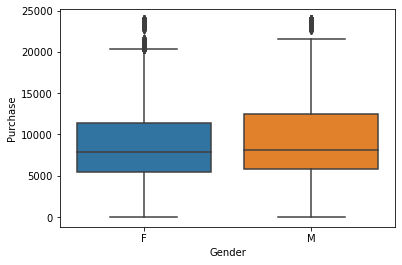

In [9]:
sns.boxplot(x = 'Gender', y = 'Purchase', data = df)

In [ ]:
# no significant difference between the medians, we can't assume

# so will wait till we do CLT on this data

In [10]:
df.groupby('Gender')['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,135809.0,8734.565765,4767.233289,12.0,5433.0,7914.0,11400.0,23959.0
M,414259.0,9437.526040,5092.186210,12.0,5863.0,8098.0,12454.0,23961.0


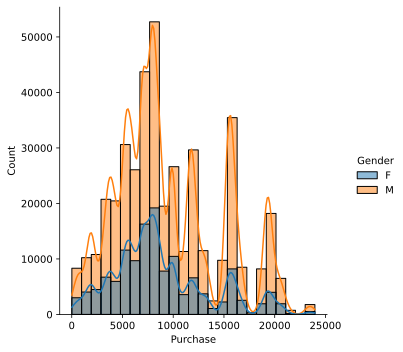

In [13]:
sns.displot(x='Purchase', 
            hue='Gender', 
            data=df, 
            bins=25, 
            kde=True)

## CLT

In [15]:
s = 300 # sample size
iterations = 1000 # total number of samples

In [16]:
df.groupby('Gender')['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,135809.0,8734.565765,4767.233289,12.0,5433.0,7914.0,11400.0,23959.0
M,414259.0,9437.526040,5092.186210,12.0,5863.0,8098.0,12454.0,23961.0


In [17]:
df.sample(300).groupby('Gender')['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,72.0,9284.569444,5194.191330,731.0,5412.75,8052.0,12646.00,20487.0
M,228.0,9519.263158,5282.855893,472.0,5409.50,8079.0,13886.25,23711.0


In [18]:
df.sample(300).groupby('Gender')['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,68.0,8933.323529,4704.549949,1655.0,5980.50,7969.5,11447.5,20378.0
M,232.0,9828.741379,5220.630506,49.0,5913.25,8406.5,15283.5,23593.0


In [19]:
df.sample(300).groupby('Gender')['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,85.0,10028.647059,5013.426971,191.0,6054.0,8156.0,13411.0,23273.0
M,215.0,10221.400000,5364.314246,588.0,6144.5,8810.0,15363.5,23615.0


In [23]:
# df[df["Gender"]=="F"]

## Males

In [25]:
s = 300 # sample size
iterations = 1000 # total number of samples

In [26]:
male_sample_mean = [df[df["Gender"]=="M"].sample(s)["Purchase"].mean() for i in range(iterations)]

In [28]:
male_sample_mean[:5]

[9720.713333333333,
 8821.976666666667,
 9235.21,
 9463.543333333333,
 9555.213333333333]

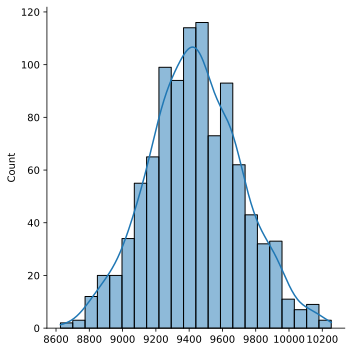

In [30]:
sns.displot(male_sample_mean, kde = True)

In [31]:
np.mean(male_sample_mean)

9435.923879999998

In [32]:
female_sample_mean = [df[df["Gender"]=="F"].sample(s)["Purchase"].mean() for i in range(iterations)]

In [33]:
female_sample_mean[:5]

[9092.736666666666, 8720.37, 8930.9, 9115.493333333334, 9021.606666666667]

In [34]:
np.mean(female_sample_mean)

8728.169736666667

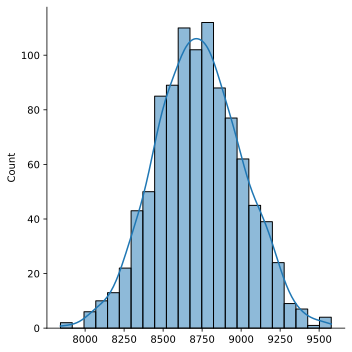

In [35]:
sns.displot(female_sample_mean, kde = True)

# confidence Interval

In [ ]:
# zscore and percentile method for finding the confidence interval (95%)

In [40]:
## Males
males_lower_limit = np.mean(male_sample_mean) - 1.96 * np.std(male_sample_mean)

In [41]:
males_upper_limit = np.mean(male_sample_mean) + 1.96 * np.std(male_sample_mean)

In [42]:
(males_lower_limit, males_upper_limit)

(8889.99294544273, 9981.854814557268)

In [43]:
## Females
females_lower_limit = np.mean(female_sample_mean) - 1.96 * np.std(female_sample_mean)

In [44]:
females_upper_limit = np.mean(female_sample_mean) + 1.96 * np.std(female_sample_mean)

In [45]:
(females_lower_limit, females_upper_limit)

(8188.577934026898, 9267.761539306435)

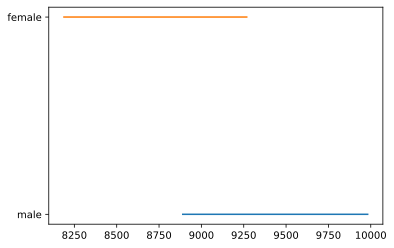

In [46]:
plt.plot((males_lower_limit, males_upper_limit), [0, 0])

plt.plot((females_lower_limit, females_upper_limit), [1, 1])

plt.yticks(range(2), ["male", "female"])

plt.show()

## Percentile method

In [48]:
male_sample_mean[:5]

[9720.713333333333,
 8821.976666666667,
 9235.21,
 9463.543333333333,
 9555.213333333333]

In [50]:
male_confidence_interval = np.percentile(male_sample_mean, [2.5, 97.5])
male_confidence_interval

array([8890.60958333, 9986.186     ])

In [51]:
female_confidence_interval = np.percentile(female_sample_mean, [2.5, 97.5])
female_confidence_interval

array([8199.97625, 9256.15375])

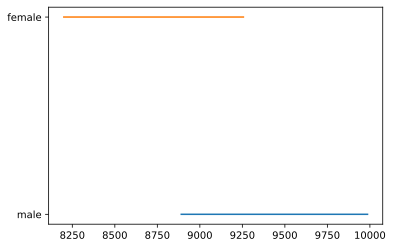

In [52]:
plt.plot((male_confidence_interval[0], male_confidence_interval[1]), [0, 0])

plt.plot((female_confidence_interval[0], female_confidence_interval[1]), [1, 1])

plt.yticks(range(2), ["male", "female"])

plt.show()

In [ ]:
## 90% CI
## marital status 
## age bins

## Yulu Introduction

In [54]:
yulu = pd.read_csv("bike_sharing.csv")

In [55]:
yulu.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


● datetime: datetime
● season: season (1: spring, 2: summer, 3: fall, 4: winter)
● holiday : whether day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
● workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
● weather:
o 1: Clear, Few clouds, partly cloudy
o 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
o 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain +
Scattered clouds
o 4: Heavy Rain + Ice Pellets + Thunderstorm + Mist, Snow + Fog
● temp: temperature in Celsius
● atemp: feeling temperature in Celsius
● humidity: humidity
● windspeed: wind speed
● casual: count of casual users
● registered: count of registered users
● count: count of total rental bikes including both casual and registered
